Librerías necesarias para ejecutar el notebook

In [1]:
using StatsBase
using Statistics
using Plots
using DataFrames
using StatsPlots

Primero vamos a crear tres vectores que contendrán los datos del ejemplo:

In [2]:
Altura=[176,182,167,172,169,191,177,161,173,168]
Peso=[68,76,61,65,70,79,69,56,61,64]
NLibrosLeidos=[16,9,12,11,14,14,8,5,12,7]

10-element Array{Int64,1}:
 16
  9
 12
 11
 14
 14
  8
  5
 12
  7

El nombre de los vectores es lo suficientemente descriptivo para saber que tipo de dato contiene cada uno. Estos datos se pueden modificar, para variar el resultado del ejemplo, y realizar diferentes modelos. Solo hay que tener en cuenta que siempre hay que tener el mismo numero de datos en cada vector.

A continuación vamos a crear un DataFrame con los datos, sobre todo porque visualmente queda más elegante, aunque no es necesario para los cálculos. 

In [3]:
tablaAPNLL=DataFrame(Altura=Altura,Peso=Peso,NLibrosLeidos=NLibrosLeidos)

,Altura,Peso,NLibrosLeidos
,Int64,Int64,Int64
1,176,68,16
2,182,76,9
3,167,61,12
4,172,65,11
5,169,70,14
6,191,79,14
7,177,69,8
8,161,56,5
9,173,61,12


Ahora podemos hacer uso de la función describe() que proporcionan el paquete Dataframe, que nos muestra el resumen estadístico da la tabla

In [4]:
describe(tablaAPNLL)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,Altura,173.6,161,172.5,191,0,Int64
2,Peso,66.9,56,66.5,79,0,Int64
3,NLibrosLeidos,10.8,5,11.5,16,0,Int64


 Empezamos calculando los coeficientes de correlación entre las parejas de variable, Altura-Peso y Altura-NLibrosLeidos.

In [5]:
rAP=cor(Altura,Peso)

0.896672338291556

Para Altura-NLibrosLeidos, su coeficiente de correlación 

In [6]:
rANLL=cor(Altura,NLibrosLeidos)

0.42838999930839905

Vamos a obtener los cálculos intermedios que nos hacen falta para poder crear la función que nos permite calcular los valores de la recta de regresión:

In [7]:
mAltura=mean(Altura)
mPeso=mean(Peso)
mNLL=mean(NLibrosLeidos)
pendienteAP=cov(Altura,Peso)/(std(Altura)*std(Peso))
pendieteANLL=cov(Altura,NLibrosLeidos)/(std(Altura)*std(NLibrosLeidos))

0.428389999308399

La función la definimos:

In [8]:
function rectaRegresionYX(x,mx,my,pendiente)
    return pendiente*(x-mx)+my
end

rectaRegresionYX (generic function with 1 method)

Como cálculo auxiliar vamos a definir el rango en que se mueve la variable Altura, que nos permitirá dibujar la recta de regresión:

In [9]:
xGrid=minimum(Altura):maximum(Altura)

161:191

Calculamos los valores de la recta de regresión entre el Peso y la Altura:

In [10]:
 rectaPA=[rectaRegresionYX(x,mAltura,mPeso,pendienteAP) for x in xGrid]

31-element Array{Float64,1}:
 55.601928537526405
 56.49860087581796
 57.395273214109515
 58.291945552401074
 59.188617890692626
 60.085290228984185
 60.981962567275744
 61.878634905567296
 62.775307243858855
 63.671979582150406
 64.56865192044197
 65.46532425873352
 66.36199659702508
  ⋮
 72.63870296506597
 73.53537530335753
 74.43204764164908
 75.32871997994064
 76.2253923182322
 77.12206465652375
 78.0187369948153
 78.91540933310687
 79.81208167139842
 80.70875400968998
 81.60542634798153
 82.50209868627309

Ya estamos en condiciones de dibujar el diagrama de dispersión y la recta de regresión:

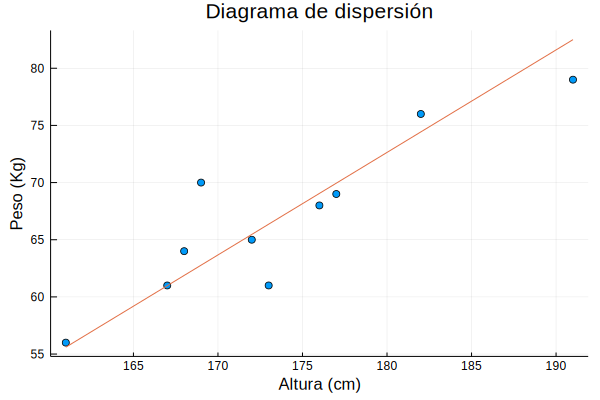

In [11]:
@df tablaAPNLL scatter(:Altura,:Peso,title = "Diagrama de dispersión",xlabel="Altura (cm)",ylabel="Peso (Kg)",legend = false)
plot!(xGrid, rectaPA,label="Recta regresión")

Calculamos los valores de la recta de regresión entre el Peso y el número de libros leídos:

In [12]:
 rectaPNLL=[rectaRegresionYX(x,mAltura,mNLL,pendieteANLL) for x in xGrid]

31-element Array{Float64,1}:
  5.402286008714176
  5.830676008022575
  6.259066007330974
  6.687456006639373
  7.1158460059477715
  7.54423600525617
  7.972626004564569
  8.401016003872968
  8.829406003181369
  9.257796002489767
  9.686186001798166
 10.114576001106565
 10.542966000414964
  ⋮
 13.541695995573757
 13.970085994882156
 14.398475994190555
 14.826865993498954
 15.255255992807353
 15.683645992115752
 16.11203599142415
 16.54042599073255
 16.968815990040948
 17.39720598934935
 17.825595988657746
 18.253985987966146

Ya estamos en condiciones de dibujar el diagrama de dispersión y la recta de regresión, esta vez sin el uso de Dataframe:

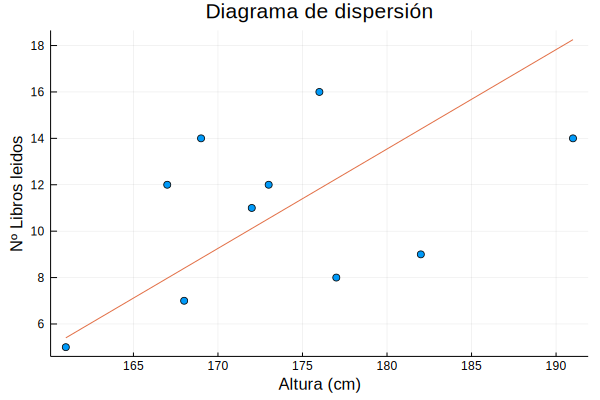

In [13]:
scatter(Altura,NLibrosLeidos,title = "Diagrama de dispersión",xlabel="Altura (cm)",ylabel="Nº Libros leidos",legend = false)
plot!(xGrid, rectaPNLL,label="Recta regresión")

Para finalizar vamos a estimar el peso de una persona 
Sabiendo su altura, pero para que quede más intuitivo vamos a definir la siguiente función:

In [14]:
pesoEstimado(x,mAltura,mPeso,pendienteAP)=rectaRegresionYX(x,mAltura,mPeso,pendienteAP)

pesoEstimado (generic function with 1 method)

Básicamente la que hemos hecho es crear una función cuyo nombre es más intuitivo y le asignamos la función que ya teníamos creada y obtenemos el peso estimado, Podemos hacer:

In [15]:
rectaRegresionYX(175.7,mAltura,mPeso,pendienteAP)

68.78301191041227

In [16]:
pesoEstimado(175.7,mAltura,mPeso,pendienteAP)

68.78301191041227